***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



***Load Data and Prepare***

In [2]:
data=pd.read_csv("gold.csv")

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


***Data Summary***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


***Data Analysis***

In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
data.shape

(2290, 6)

In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
correlations=data.corr()

<Axes: >

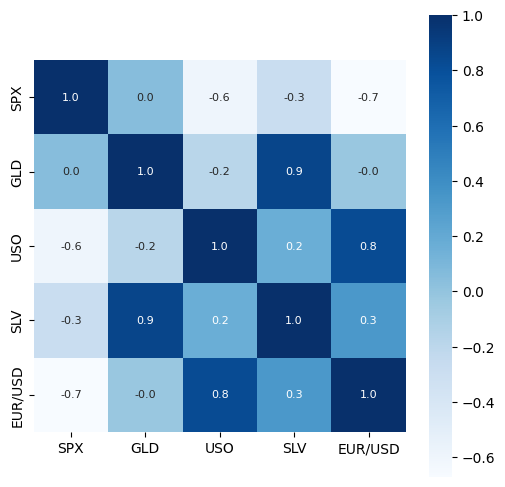

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(correlations,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

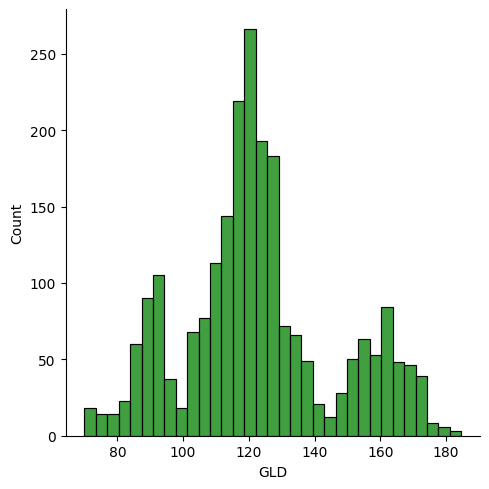

In [13]:
sns.displot(data['GLD'],color='green')

***Train Test Split Data***

In [14]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

***Model Training***

In [16]:
regressor=RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
#tested result
result=regressor.predict(X_test)
result=pd.DataFrame(result)
result.head()

,0
0,168.719499
1,82.318900
2,115.824600
3,127.735701
4,120.696401


In [19]:
score=metrics.r2_score(Y_test,result)
print("R square Error: ",score)


R square Error:  0.9888553066534357


***Application Phase***

In [30]:
SPX=input("Enter SPX: ").strip()
EUR=input("Enter EUR/USD: ").strip()
USO=input("Enter USO: ").strip()
SLV=input("Enter SLV: ").strip()


Enter SPX: 1390.189941
Enter EUR/USD: 1.557099
Enter USO: 76.05998
Enter SLV: 15.590


In [31]:


data = {'SPX': [SPX],'USO': [USO], 'SLV': [SLV], 'EUR/USD': [EUR], }
df = pd.DataFrame(data)

print("User Input DataFrame:")
print(df)

User Input DataFrame:
           SPX       USO     SLV   EUR/USD
0  1390.189941  76.05998  15.590  1.557099


In [33]:
predict=regressor.predict(df)
print("The Price of GLD is: ",predict)


The Price of GLD is:  [86.69339943]
